In [18]:
import scipy.io as sio

GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
  from google.colab import drive, files
  drive.mount('/content/drive')
  path = "/content/drive/MyDrive/ML"

dataset= path+"/data.mat"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
contents = sio.loadmat(dataset)
originalimages = contents['images']
label = contents ['C']
print ("images_original shape: ", originalimages.shape)
print(label[1,0])
print(originalimages[0:1])

images_original shape:  (50, 3072)
['morgan freeman']
[[184 184 184 ... 183 182 182]]


In [20]:
import numpy as np
images = np.transpose(originalimages)
print("images.shape", images.shape)
imgs = np.reshape(images, [32,32,3,-1],order="F")
print("imgs.shape", imgs.shape)

images.shape (3072, 50)
imgs.shape (32, 32, 3, 50)


imgs[:,:,:,40].shape (32, 32, 3)
['fawad khan']


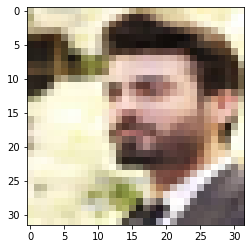

In [21]:
from matplotlib import pyplot as plt
plt.imshow(imgs[:,:,:,40])
print("imgs[:,:,:,40].shape", imgs[:,:,:,40].shape)
print(label[40,0])

Reshaping Rescaling and Displaying Test mage

img3.shape (3072, 1)


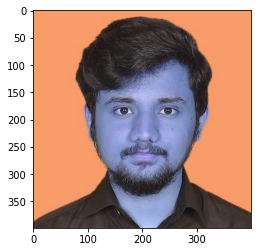

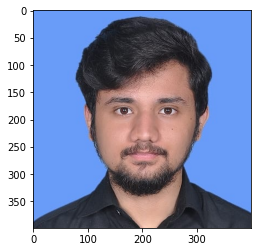

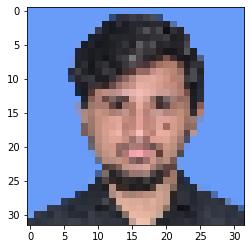

In [22]:
import cv2
from math import sqrt
test_image = path + "/pic.jpeg"

img0 = cv2.imread(test_image)
plt.figure()
plt.imshow(img0)

img1=cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img1)

img2=cv2.resize(img1, (32,32))
plt.figure()
plt.imshow(img2)

img3 = np.reshape(img2, [3072,1], order="F")
print("img3.shape", img3.shape)

Euclidean Distance calculation

In [23]:
def euclidean(row1, row2):
  distance = 0.00
  for i in range(len(row1)):
    distance = distance + (row1[i]-row2[i])**2
  return sqrt(distance)

In [24]:
dist = np.zeros(50)
print("Shape of Images",images.shape)
for i in range(50):
  selectedimg = images[0:3072,i]
  dist[i] = euclidean(img3, selectedimg)
print("Dimension of selected images",selectedimg.shape)
print("\nEuclidean Distances:\n", dist)
print("\nMinimum Distance:", min(dist))
mindist = np.argmin(dist)
print("Index of Minimum Distance:", mindist)

Shape of Images (3072, 50)
Dimension of selected images (3072,)

Euclidean Distances:
 [569.38914637 560.26422338 567.80278266 554.49526599 583.22808574
 578.53867632 566.64715653 569.22227644 565.03805182 574.5110965
 553.19255237 584.04537495 567.2212972  567.46013076 575.65614737
 572.57837891 567.90844333 566.38679363 566.27820018 561.19248035
 567.88819322 568.51385207 526.44467895 574.11671287 543.6607398
 535.65380611 569.73151572 566.90387192 573.15093998 506.42176099
 539.91202987 576.88473719 554.86214504 579.37466289 563.23352173
 565.04424606 561.56388773 565.5183463  565.44230475 573.57649882
 573.76650303 559.16008441 574.03571317 550.1372556  565.68807659
 592.03631645 565.90370206 568.34496567 557.83779004 563.0470673 ]

Minimum Distance: 506.4217609858407
Index of Minimum Distance: 29


In [25]:
dist2 = [0.0]*50

for k in range (0,len(dist)):
  dist2[k]=dist[k]

dist2.sort()
print("dist2",dist2)

indices = []
ind = 0
for x in range (50):
  for y in range(50):
    if dist2[x] == dist[y]:
      ind = y
      indices.append(ind)
      break
print("indeces in main distance vector",indices)

dist2 [506.4217609858407, 526.4446789549686, 535.6538061098792, 539.9120298715338, 543.6607398001073, 550.1372556008182, 553.1925523721375, 554.4952659852021, 554.8621450414508, 557.8377900429479, 559.1600844123265, 560.2642233803618, 561.1924803487659, 561.5638877278345, 563.0470673043241, 563.2335217296641, 565.0380518159817, 565.0442460551209, 565.442304749123, 565.5183462983318, 565.6880765934527, 565.9037020553939, 566.2782001807946, 566.3867936313487, 566.6471565268814, 566.9038719218629, 567.2212972024234, 567.4601307581, 567.8027826631356, 567.8881932211657, 567.9084433251543, 568.3449656678591, 568.5138520739843, 569.2222764439214, 569.389146366525, 569.7315157159554, 572.5783789141885, 573.150939980037, 573.5764988212121, 573.7665030306318, 574.0357131747118, 574.116712872914, 574.5110964985794, 575.656147365769, 576.8847371875945, 578.5386763216441, 579.3746628909483, 583.2280857434765, 584.0453749495839, 592.0363164536446]
indeces in main distance vector [29, 22, 25, 30, 24

1NN

Nearest Neighbor  1  =  ['bilawal bhutto']


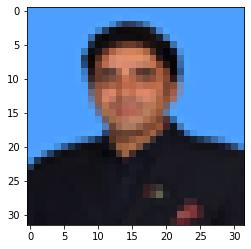

In [26]:
b=0
print("Nearest Neighbor ",b+1," = ", label[indices[b],0])
      
plt.figure()
plt.imshow(imgs[:,:,:,indices[0]])

3NN

Nearest Neighbor  1  =  ['bilawal bhutto']
Nearest Neighbor  2  =  ['meryl streep']
Nearest Neighbor  3  =  ['bilawal bhutto']


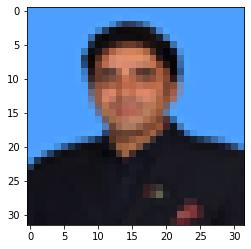

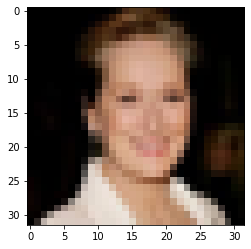

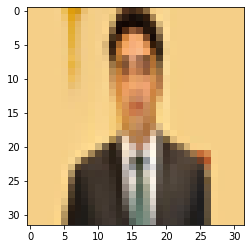

In [27]:
for b in range(3):
 print("Nearest Neighbor ",b+1," = ", label[indices[b],0])      
 plt.figure()
 plt.imshow(imgs[:,:,:,indices[b]])

5NN

Nearest Neighbor  1  =  ['bilawal bhutto']
Nearest Neighbor  2  =  ['meryl streep']
Nearest Neighbor  3  =  ['bilawal bhutto']
Nearest Neighbor  4  =  ['Viola Davis']
Nearest Neighbor  5  =  ['meryl streep']


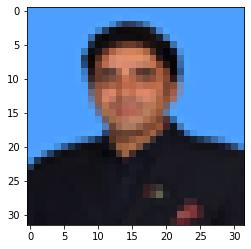

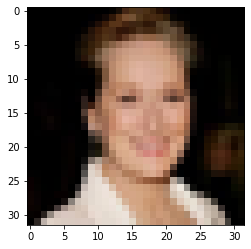

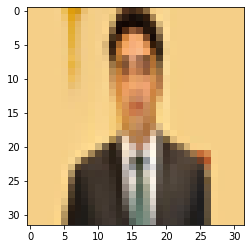

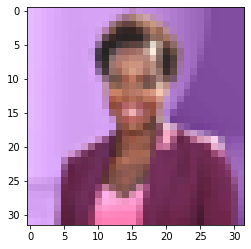

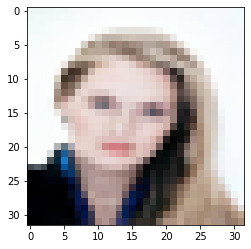

In [28]:
b=0
for b in range(5):
 print("Nearest Neighbor ",b+1," = ", label[indices[b],0])      
 plt.figure()
 plt.imshow(imgs[:,:,:,indices[b]])

Generic Function of KNN

In [29]:
def user_input():
  v = int(input("Please Enter the Value of K \n"))
  z=[]
  index=[]
  label2=[]
  countt = 0
  for k in range(v):
    index.append(indices[k])
  for b in range (v):
    z.append(index[b])
    label2.append(label[z[b],0][0])
    print("Nearest Neighbor ",b+1," = ", label[z[b],0][0])
    plt.figure()
    plt.imshow(imgs[:,:,:,z[b]])

## M A J O R I T Y  V O T I N G ##
  m_v = []
  value = 0
  for h in range (v):
    print(label2[h])
    for p in range(v):
      if label2[h]==label2[p]:
        countt=countt+1
    m_v.append(countt)
    countt=0  

  for h in range (v):
    print("\nNeighbor ",h," = ",label[z[h],0][0], "\t has appeared for ", m_v[h], "\t times")


Calling the Generic Function

Please Enter the Value of K 
8
Nearest Neighbor  1  =  bilawal bhutto
Nearest Neighbor  2  =  meryl streep
Nearest Neighbor  3  =  bilawal bhutto
Nearest Neighbor  4  =  Viola Davis
Nearest Neighbor  5  =  meryl streep
Nearest Neighbor  6  =  fawad khan
Nearest Neighbor  7  =  tom cruise
Nearest Neighbor  8  =  morgan freeman
bilawal bhutto
meryl streep
bilawal bhutto
Viola Davis
meryl streep
fawad khan
tom cruise
morgan freeman

Neighbor  0  =  bilawal bhutto 	 has appeared for  2 	 times

Neighbor  1  =  meryl streep 	 has appeared for  2 	 times

Neighbor  2  =  bilawal bhutto 	 has appeared for  2 	 times

Neighbor  3  =  Viola Davis 	 has appeared for  1 	 times

Neighbor  4  =  meryl streep 	 has appeared for  2 	 times

Neighbor  5  =  fawad khan 	 has appeared for  1 	 times

Neighbor  6  =  tom cruise 	 has appeared for  1 	 times

Neighbor  7  =  morgan freeman 	 has appeared for  1 	 times


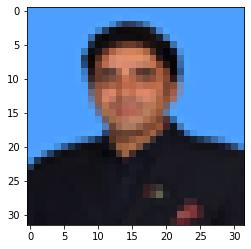

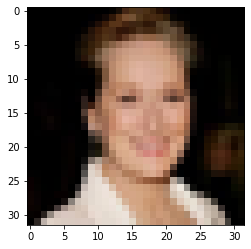

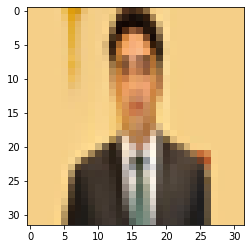

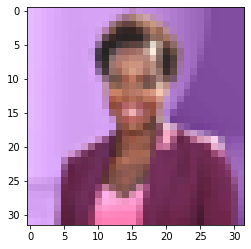

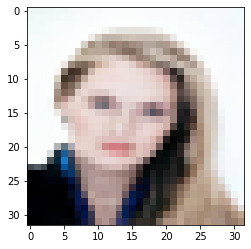

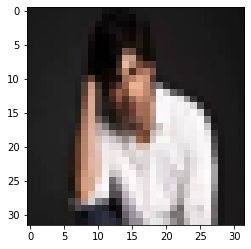

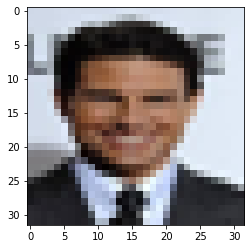

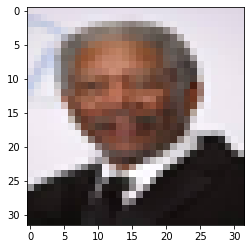

In [30]:
user_input()